In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


** (1) EDA**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/archive/Train.csv")
train

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
0,2,8.032,14,8,3,6,0,1
1,31,77.730,8,3,3,8,1,0
2,40,59.203,3,12,11,3,0,1
3,12,73.080,4,5,7,6,0,0
4,4,15.666,13,15,6,7,2,1
...,...,...,...,...,...,...,...,...
538,16,74.017,7,4,5,7,1,0
539,2,70.460,7,5,6,4,0,0
540,1,79.243,7,5,3,8,1,0
541,40,69.140,7,8,4,5,1,1


In [9]:
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/archive/Test.csv")
test

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results
0,41,18.272,13,12,9,7,0
1,17,64.799,6,10,7,4,1
2,31,68.890,3,3,7,8,0
3,3,16.492,15,10,7,4,1
4,9,17.178,7,3,8,3,1
...,...,...,...,...,...,...,...
228,2,73.165,6,5,5,5,0
229,2,6.952,8,8,5,4,1
230,3,6.796,7,5,4,5,1
231,3,9.197,13,12,10,7,1


In [10]:
train.tail()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
538,16,74.017,7,4,5,7,1,0
539,2,70.460,7,5,6,4,0,0
540,1,79.243,7,5,3,8,1,0
541,40,69.140,7,8,4,5,1,1
542,13,23.332,14,12,10,3,2,1


In [11]:
test.shape, train.shape

((233, 7), (543, 8))

In [12]:
train.dtypes,


(City                      int64
 Location_Score          float64
 Internal_Audit_Score      int64
 External_Audit_Score      int64
 Fin_Score                 int64
 Loss_score                int64
 Past_Results              int64
 IsUnderRisk               int64
 dtype: object,)

In [13]:
test.dtypes

City                      int64
Location_Score          float64
Internal_Audit_Score      int64
External_Audit_Score      int64
Fin_Score                 int64
Loss_score                int64
Past_Results              int64
dtype: object

In [19]:
train.describe()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
mean,19.576427,32.259346,8.189687,7.327808,7.046041,5.530387,0.613260,0.626151
std,14.722687,24.887291,3.312022,3.450667,3.156978,1.839124,0.764509,0.484270
min,0.000000,5.185000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000
25%,6.000000,13.565000,6.000000,5.000000,5.000000,4.000000,0.000000,0.000000
50%,14.000000,19.803000,8.000000,7.000000,7.000000,6.000000,1.000000,1.000000
75%,37.000000,62.594000,11.000000,10.000000,8.000000,7.000000,1.000000,1.000000
max,44.000000,80.809000,15.000000,15.000000,15.000000,13.000000,10.000000,1.000000


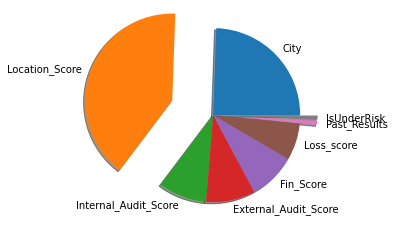

In [21]:
x_mean = np.array([19.57, 32.25, 7.18, 7.32, 7.0, 5.53, 0.61, 0.62 ])
mylabels = (["City", "Location_Score", "Internal_Audit_Score", "External_Audit_Score", "Fin_Score", "Loss_score", "Past_Results", "IsUnderRisk"])
seprate = [0, 0.5, 0, 0, 0, 0, 0.2, 0.2]

plt.pie(x_mean, labels = mylabels, shadow = True, explode = seprate)

plt.show()

In [18]:
X=train.drop('IsUnderRisk',axis='columns')
y=train['IsUnderRisk']

X.head()
#spliting in dependent and indipendent variable

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results
0,2,8.032,14,8,3,6,0
1,31,77.730,8,3,3,8,1
2,40,59.203,3,12,11,3,0
3,12,73.080,4,5,7,6,0
4,4,15.666,13,15,6,7,2


In [22]:
from sklearn.model_selection import train_test_split


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=0)
#spliting train test

In [28]:
from sklearn.linear_model import LogisticRegression
Reg=LogisticRegression()

In [29]:
Reg.fit(X_train,y_train)

LogisticRegression()

In [30]:
Reg.predict(X_test)

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1])

In [31]:
Reg.score(X_test,y_test)

0.7981651376146789

**(2). creating hidden layer & (3). dropout layer**

In [32]:
import tensorflow as tf


In [33]:
model = tf.keras.Sequential([
                             tf.keras.layers.InputLayer(input_shape=(7, )), # 7 variables
                             tf.keras.layers.Dense(3),
                             tf.keras.layers.Dropout(0.05),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.006),
              loss='binary_crossentropy')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 24        
                                                                 
 dropout (Dropout)           (None, 3)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.fit(X_train,y_train,epochs=200)

Epoch 1/200
14/14 [==============================] - 1s 5ms/step - loss: 2.8940
Epoch 2/200
14/14 [==============================] - 0s 5ms/step - loss: 0.7654
Epoch 3/200
14/14 [==============================] - 0s 3ms/step - loss: 0.6110
Epoch 4/200
14/14 [==============================] - 0s 5ms/step - loss: 0.5537
Epoch 5/200
14/14 [==============================] - 0s 3ms/step - loss: 0.5258
Epoch 6/200
14/14 [==============================] - 0s 3ms/step - loss: 0.5374
Epoch 7/200
14/14 [==============================] - 0s 3ms/step - loss: 0.5116
Epoch 8/200
14/14 [==============================] - 0s 8ms/step - loss: 0.5184
Epoch 9/200
14/14 [==============================] - 0s 3ms/step - loss: 0.5042
Epoch 10/200
14/14 [==============================] - 0s 3ms/step - loss: 0.5259
Epoch 11/200
14/14 [==============================] - 0s 3ms/step - loss: 0.5287
Epoch 12/200
14/14 [==============================] - 0s 4ms/step - loss: 0.4729
Epoch 13/200
14/14 [=================

In [35]:
model.evaluate(X_test,y_test)


4/4 [==============================] - 0s 6ms/step - loss: 0.3985


0.39845821261405945

In [36]:
model.predict(X_test)

array([[0.32114768],
       [0.21693829],
       [0.79157454],
       [0.24964625],
       [0.91349125],
       [0.52123296],
       [0.05874655],
       [0.93147784],
       [0.31272727],
       [0.6835581 ],
       [0.8564127 ],
       [0.9696286 ],
       [0.3735419 ],
       [0.7526517 ],
       [0.85119617],
       [0.40168738],
       [0.50785553],
       [0.7107671 ],
       [0.64032006],
       [0.9516603 ],
       [0.9012334 ],
       [0.42883712],
       [0.74585056],
       [0.61689186],
       [0.97991824],
       [0.3659317 ],
       [0.06135121],
       [0.88614476],
       [0.41608024],
       [0.9055847 ],
       [0.31922647],
       [0.9378828 ],
       [0.9595003 ],
       [0.31704462],
       [0.984097  ],
       [0.72621524],
       [0.95671165],
       [0.14493611],
       [0.9854456 ],
       [0.95751625],
       [0.20878753],
       [0.9924109 ],
       [0.29303604],
       [0.96940637],
       [0.39948305],
       [0.9835353 ],
       [0.5048665 ],
       [0.902



**AUC-ROC score **



In [37]:
from sklearn.metrics import roc_auc_score

In [42]:
roc_auc_score(y_test, Reg.predict_proba(X_test)[:, 1])


0.9114583333333334

In [45]:
y_=np.array(y)
y_=y_.reshape(-1,1)
y_

array([[1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
    

In [46]:
encoder=OneHotEncoder(sparse=False) #OneHotEncodeing
y2=encoder.fit_transform(y_)
y2

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [48]:
x_train, x_test, y_train, y_test = train_test_split(X,y2,test_size=0.2)


** Dense neural netwrok with 2 output**

In [49]:
model2 = tf.keras.Sequential([
                              tf.keras.layers.InputLayer(input_shape=(7, )),
                              tf.keras.layers.Dense(3),
                              tf.keras.layers.Dense(2, activation='softmax')
])

model2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.006), loss='categorical_crossentropy')
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 3)                 24        
                                                                 
 dense_3 (Dense)             (None, 2)                 8         
                                                                 
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________


In [51]:
model2.fit(X_train,y_train,epochs=200)


Epoch 1/200
14/14 [==============================] - 0s 2ms/step - loss: 0.6759
Epoch 2/200
14/14 [==============================] - 0s 2ms/step - loss: 0.6711
Epoch 3/200
14/14 [==============================] - 0s 2ms/step - loss: 0.6777
Epoch 4/200
14/14 [==============================] - 0s 2ms/step - loss: 0.6782
Epoch 5/200
14/14 [==============================] - 0s 3ms/step - loss: 0.6721
Epoch 6/200
14/14 [==============================] - 0s 3ms/step - loss: 0.6685
Epoch 7/200
14/14 [==============================] - 0s 3ms/step - loss: 0.6695
Epoch 8/200
14/14 [==============================] - 0s 3ms/step - loss: 0.6845
Epoch 9/200
14/14 [==============================] - 0s 3ms/step - loss: 0.6783
Epoch 10/200
14/14 [==============================] - 0s 2ms/step - loss: 0.6710
Epoch 11/200
14/14 [==============================] - 0s 2ms/step - loss: 0.6677
Epoch 12/200
14/14 [==============================] - 0s 2ms/step - loss: 0.6688
Epoch 13/200
14/14 [=================

In [52]:
y_pred=model2.predict(X_test)
y_pred


array([[0.45775875, 0.5422413 ],
       [0.46735442, 0.5326456 ],
       [0.3555039 , 0.6444961 ],
       [0.38166982, 0.6183302 ],
       [0.4122637 , 0.5877363 ],
       [0.4141693 , 0.5858307 ],
       [0.3031469 , 0.69685316],
       [0.33664456, 0.6633554 ],
       [0.47906992, 0.52093   ],
       [0.46954355, 0.5304565 ],
       [0.44472408, 0.5552759 ],
       [0.37186012, 0.62814   ],
       [0.31529844, 0.6847016 ],
       [0.35964283, 0.6403572 ],
       [0.330309  , 0.66969097],
       [0.31266192, 0.68733805],
       [0.5086485 , 0.49135154],
       [0.28701916, 0.7129808 ],
       [0.3358297 , 0.6641703 ],
       [0.43845177, 0.5615483 ],
       [0.29444137, 0.7055586 ],
       [0.29945982, 0.7005401 ],
       [0.434898  , 0.565102  ],
       [0.2880948 , 0.7119052 ],
       [0.37426013, 0.62573993],
       [0.36066845, 0.6393316 ],
       [0.328003  , 0.671997  ],
       [0.36576957, 0.63423043],
       [0.3258979 , 0.67410207],
       [0.4226274 , 0.5773726 ],
       [0.

** log koss score**

In [53]:
model2.evaluate(x_test,y_test)


4/4 [==============================] - 0s 5ms/step - loss: 0.6591


0.6590688824653625

In [54]:
from sklearn.metrics import log_loss



In [55]:
log_loss(y_test,y_pred)


0.6642859816004377